In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [20]:
x_train = h5py.File("./data/X_train.h5", "r")
y_train = pd.read_csv("./data/y_train.csv").values[:, 1].squeeze()

In [21]:
x_train = x_train["features"][:, :11]
y_train = y_train[:100]

In [25]:
def one_hot(x):
    if x == 2:
        return np.array([1, 0])
    else:
        return np.array([0, 1])

In [36]:
x_train2 = np.zeros((len(x_train), 12))
for j, i in enumerate(x_train):
    hot = one_hot(i[5])
    x_train2[j] = np.concatenate([i[:5], hot, i[6:]])

In [43]:
mini = np.min(x_train2, axis = 0)
maxi = np.max(x_train2, axis = 0)

In [45]:
x_train2 = (x_train2 - mini)/(maxi - mini)

In [51]:
np.save('/data/head', x_train2)

In [50]:
x_train2.shape

(261634, 12)

In [95]:
def print_eeg_label(label):
    valid = x_train[y_train == label]
    eeg = valid[np.random.randint(valid.shape[0])][11:]
    plt.plot(eeg)

In [5]:
def print_eeg_fft(label):
    valid = x_train[y_train == label]
    eeg   = valid[np.random.randint(valid.shape[0])][11:]
    freq  = np.fft.fftfreq(eeg.shape[0]) 
    plt.plot(freq*125, np.abs(np.fft.fft(eeg)))

In [189]:
maxis = np.max(np.abs(x_train[:, 11:]), axis = -1)
mean  = np.mean(np.abs(x_train[:, 11:]), axis = -1)

In [190]:
maxis.mean()

130.24835340836495

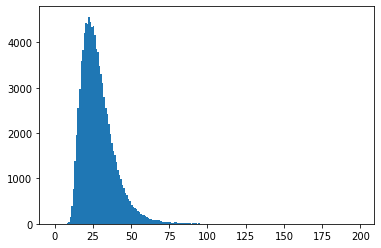

In [199]:
_ = plt.hist(mean, bins = range(0, 200))

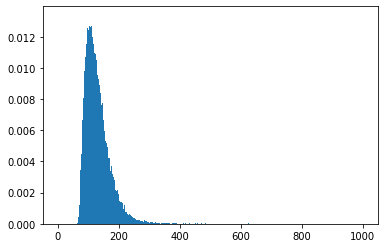

In [192]:
prob, _, u = plt.hist(maxis, bins = range(0, 1000), density = True)

In [193]:
np.sum(prob[:205])

0.9488048804880489

In [194]:
x_train = np.clip(x_train, -205, 205)

In [197]:
x_train = 2*((x_train + 205) / 410) - 1